Product catogries inshits Analysis

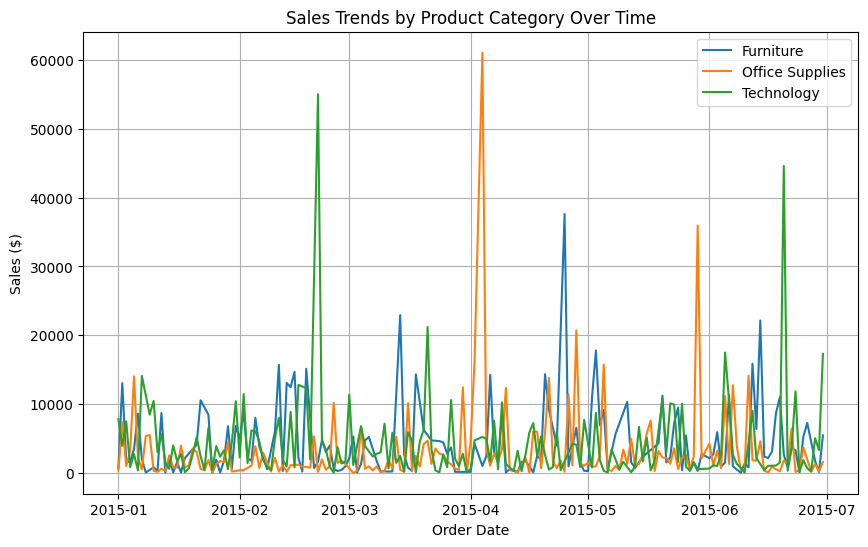

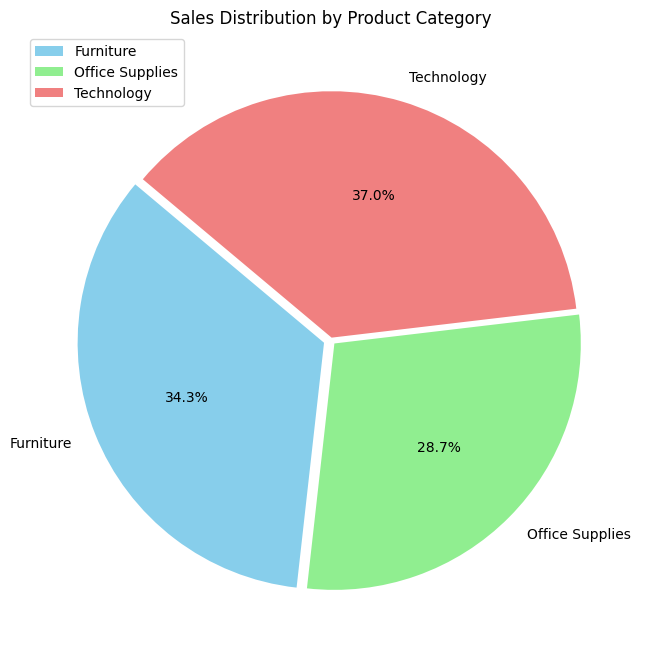

Most Profitable Product Category:
  Product Category            Product Sub-Category      Sales       Profit
5  Office Supplies  Binders and Binder Accessories  185928.14  59296.38943

Most Profitable Subcategory within Each Category:
   Product Category            Product Sub-Category      Sales       Profit
5   Office Supplies  Binders and Binder Accessories  185928.14  59296.38943
1         Furniture              Chairs & Chairmats  261072.73  48695.83660
16       Technology    Telephones and Communication  198764.49  40790.51424


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('StoreUS-2015.csv')

# Step 1: Convert Order Date to datetime for time-based analysis
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

# Step 2: Analyze total sales and profit by Product Category and Subcategory
category_sales_profit = data.groupby(['Product Category', 'Product Sub-Category']).agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# Identify the most profitable Product Category and Subcategory
most_profitable_category = category_sales_profit.sort_values(by='Profit', ascending=False).head(1)
most_profitable_subcategory = category_sales_profit.sort_values(by='Profit', ascending=False).groupby('Product Category').head(1)

# Step 3: Visualize sales trends for different product categories over time
# Grouping by Product Category and Order Date to analyze sales trends
sales_trends_by_category = data.groupby(['Order Date', 'Product Category']).agg({
    'Sales': 'sum'
}).reset_index()

# Step 4: Plot Sales Trends Over Time for Product Categories
plt.figure(figsize=(10, 6))
for category in sales_trends_by_category['Product Category'].unique():
    category_data = sales_trends_by_category[sales_trends_by_category['Product Category'] == category]
    plt.plot(category_data['Order Date'], category_data['Sales'], label=category)

plt.title('Sales Trends by Product Category Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Pie Chart for Sales by Product Category
category_sales = data.groupby('Product Category').agg({
    'Sales': 'sum'
}).reset_index()

# Create a pie chart for sales by product category
plt.figure(figsize=(8, 8))

plt.pie(category_sales['Sales'], labels=category_sales['Product Category'],explode = (.03,.02,.01) ,autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightpink'])
plt.title('Sales Distribution by Product Category')
plt.legend()
plt.show()

# Step 6: Insights from Most Profitable Categories
print("Most Profitable Product Category:")
print(most_profitable_category)

print("\nMost Profitable Subcategory within Each Category:")
print(most_profitable_subcategory)
